In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from skimpy import skim
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'notebook'
import plotly.offline as pyo
pyo.init_notebook_mode(connected=True)
pd.options.display.max_columns=100
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('winequalityN.csv')
df

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0     white            7.0             0.270         0.36            20.7   
1     white            6.3             0.300         0.34             1.6   
2     white            8.1             0.280         0.40             6.9   
3     white            7.2             0.230         0.32             8.5   
4     white            7.2             0.230         0.32             8.5   
...     ...            ...               ...          ...             ...   
6492    red            6.2             0.600         0.08             2.0   
6493    red            5.9             0.550         0.10             2.2   
6494    red            6.3             0.510         0.13             2.3   
6495    red            5.9             0.645         0.12             2.0   
6496    red            6.0             0.310         0.47             3.6   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0         0.045                 45.0                 170.0  1.00100  3.00   
1         0.049                 14.0                 132.0  0.99400  3.30   
2         0.050                 30.0                  97.0  0.99510  3.26   
3         0.058                 47.0                 186.0  0.99560  3.19   
4         0.058                 47.0                 186.0  0.99560  3.19   
...         ...                  ...                   ...      ...   ...   
6492      0.090                 32.0                  44.0  0.99490  3.45   
6493      0.062                 39.0                  51.0  0.99512  3.52   
6494      0.076                 29.0                  40.0  0.99574  3.42   
6495      0.075                 32.0                  44.0  0.99547  3.57   
6496      0.067                 18.0                  42.0  0.99549  3.39   

      sulphates  alcohol  quality  
0          0.45      8.8        6  
1          0.49      9.5        6  
2          0.44     10.1        6  
3          0.40      9.9        6  
4          0.40      9.9        6  
...         ...      ...      ...  
6492       0.58     10.5        5  
6493        NaN     11.2        6  
6494       0.75     11.0        6  
6495       0.71     10.2        5  
6496       0.66     11.0        6  

[6497 rows x 13 columns]

In [3]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 6497   │ │ float64     │ 11    │                                                          │
│ │ Number of columns │ 13     │ │ string      │ 1     │                                                          │
│ └───────────────────┴────────┘ │ int32       │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA  ┃ NA %   ┃ mean    ┃ sd      ┃ p0      ┃ p25    ┃ p75    ┃ p100  ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━━┩  │
│ │ fixed acidity             │  10 │   0.15 │     7.2 │     1.3 │     3.8 │    6.4 │    7.7 │    16 │   ▁█▂   │  │
│ │ volatile acidity          │   8 │   0.12 │    0.34 │    0.16 │    0.08 │   0.23 │    0.4 │   1.6 │   █▄▁   │  │
│ │ citric acid               │   3 │   0.05 │    0.32 │    0.15 │       0 │   0.25 │   0.39 │   1.7 │   ▅█▁   │  │
│ │ residual sugar            │   2 │   0.03 │     5.4 │     4.8 │     0.6 │    1.8 │    8.1 │    66 │   █▁    │  │
│ │ chlorides                 │   2 │   0.03 │   0.056 │   0.035 │   0.009 │  0.038 │  0.065 │  0.61 │    █    │  │
│ │ free sulfur dioxide       │   0 │      0 │      31 │      18 │       1 │     17 │     41 │   290 │   █▁    │  │
│ │ total sulfur dioxide      │   0 │      0 │     120 │      57 │       6 │     77 │    160 │   440 │   ▄█▄   │  │
│ │ density                   │   0 │      0 │    0.99 │   0.003 │    0.99 │   0.99 │      1 │     1 │   █▅    │  │
│ │ pH                        │   9 │   0.14 │     3.2 │    0.16 │     2.7 │    3.1 │    3.3 │     4 │   ▅█▃   │  │
│ │ sulphates                 │   4 │   0.06 │    0.53 │    0.15 │    0.22 │   0.43 │    0.6 │     2 │   █▇▁   │  │
│ │ alcohol                   │   0 │      0 │      10 │     1.2 │       8 │    9.5 │     11 │    15 │  ▂█▆▃▁  │  │
│ │ quality                   │   0 │      0 │     5.8 │    0.87 │       3 │      5 │      6 │     9 │  ▁▆█▃▁  │  │
│ └───────────────────────────┴─────┴────────┴─────────┴─────────┴─────────┴────────┴────────┴───────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ type                      │       0 │          0 │                            1 │                     6497 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [5]:
df.isna().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

## 🍀 Cleaning the Data

In [6]:
df[df.isna().any(axis=1)]

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
17    white            NaN             0.660         0.48             1.2   
33    white            6.2             0.120         0.34             NaN   
54    white            6.8             0.200         0.59             0.9   
86    white            7.2               NaN         0.63            11.0   
98    white            9.8             0.360         0.46            10.5   
139   white            8.1             0.280         0.39             1.9   
174   white            NaN             0.270         0.31            17.7   
224   white            6.3             0.495         0.22             1.8   
249   white            NaN             0.410         0.14            10.4   
267   white            NaN             0.580         0.07             6.9   
268   white            5.3             0.585          NaN             7.1   
368   white            NaN             0.290         0.48             2.3   
438   white            7.4             0.155         0.34             NaN   
440   white            6.7             0.220         0.37             1.6   
518   white            NaN             0.130         0.28             1.9   
521   white            7.9               NaN         0.26             2.1   
587   white            6.1             0.320         0.25             1.7   
621   white            6.5               NaN         0.43             8.9   
697   white            7.5             0.310         0.51            14.8   
747   white            7.2             0.290         0.40             7.6   
812   white            6.4               NaN         0.28             1.1   
909   white            7.5             0.240          NaN            13.0   
972   white            6.8             0.220         0.35            17.5   
1079  white            NaN               NaN         0.29             6.2   
2894  white            6.4               NaN         0.36             1.4   
2902  white            NaN             0.360         0.14             8.9   
4892  white            6.5             0.230         0.38             1.3   
4895  white            6.5               NaN         0.19             1.2   
6320    red            7.0             0.540          NaN             2.1   
6321    red            6.4             0.530         0.09             3.9   
6428    red            NaN             0.440         0.09             2.2   
6429    red            NaN             0.705         0.10             2.8   
6486    red            7.2               NaN         0.33             2.5   
6493    red            5.9             0.550         0.10             2.2   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
17        0.029                 29.0                  75.0  0.98920  3.33   
33        0.045                 43.0                 117.0  0.99390  3.42   
54        0.147                 38.0                 132.0  0.99300   NaN   
86        0.044                 55.0                 156.0  0.99740  3.09   
98          NaN                  4.0                  83.0  0.99560  2.89   
139       0.029                 18.0                  79.0  0.99230   NaN   
174       0.051                 33.0                 173.0  0.99900  3.09   
224       0.046                 31.0                 140.0  0.99290  3.39   
249       0.037                 18.0                 119.0  0.99600  3.38   
267       0.043                 34.0                 149.0  0.99440  3.34   
268       0.044                 34.0                 145.0  0.99450  3.34   
368       0.049                 36.0                 178.0  0.99310  3.17   
438       0.045                 73.5                 214.0  0.99340  3.18   
440       0.028                 24.0                 102.0  0.99130   NaN   
518       0.050                 20.0                  78.0  0.99180  3.43   
521       0.039                  8.0                 143.0  0.99420  3.05   
58

In [7]:
df.isna().sum().reset_index().rename(columns={'index': 'features',
                                                0: 'count'}).sort_values(by=['count'])

features  count
0                   type      0
6    free sulfur dioxide      0
7   total sulfur dioxide      0
8                density      0
11               alcohol      0
12               quality      0
4         residual sugar      2
5              chlorides      2
3            citric acid      3
10             sulphates      4
2       volatile acidity      8
9                     pH      9
1          fixed acidity     10

In [8]:
df.isna().sum().sum()

38

### 🌟Residual Sugars

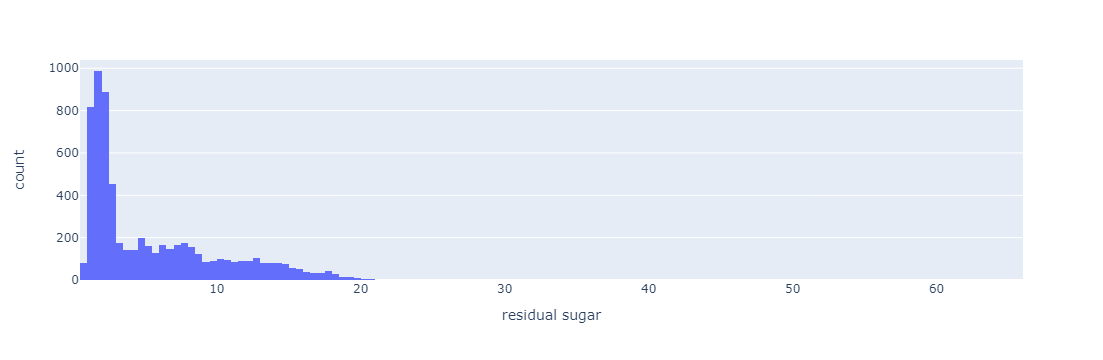

In [9]:
fig = px.histogram(df, x="residual sugar")
fig.show()

In [10]:
df[df['residual sugar'].isna()]

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
33   white            6.2             0.120         0.34             NaN   
438  white            7.4             0.155         0.34             NaN   

     chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
33       0.045                 43.0                 117.0   0.9939  3.42   
438      0.045                 73.5                 214.0   0.9934  3.18   

     sulphates  alcohol  quality  
33        0.51      9.0        6  
438       0.61      9.9        7

In [11]:
df['residual sugar'].unique()

array([20.7 ,  1.6 ,  6.9 ,  8.5 ,  7.  ,  1.5 ,  1.45,  4.2 ,  1.2 ,
       19.25,  1.1 ,  7.5 ,  2.9 ,  1.7 ,  1.3 ,  9.  ,  1.  ,  8.7 ,
        2.  , 10.4 ,  2.05,   nan, 14.95,  5.4 , 17.95,  2.5 ,  7.4 ,
        1.4 ,  4.4 ,  5.  ,  0.9 , 11.9 , 12.4 ,  4.6 ,  4.9 ,  6.4 ,
        2.1 , 10.1 ,  7.8 ,  4.8 ,  8.8 , 16.  ,  6.1 ,  8.2 , 11.8 ,
       11.  , 13.3 ,  1.8 , 15.9 , 10.5 , 13.5 ,  9.6 , 12.1 , 18.9 ,
       14.4 , 16.5 , 18.75,  9.2 ,  3.3 ,  5.7 , 12.2 ,  6.85,  7.6 ,
        2.8 ,  2.7 , 13.1 , 15.8 ,  8.1 , 15.7 ,  1.9 ,  2.2 ,  4.3 ,
        5.2 ,  4.1 ,  8.  , 10.2 , 14.  , 14.5 , 13.  ,  2.4 ,  8.95,
        9.85,  0.8 ,  4.55, 17.7 ,  5.1 , 12.9 ,  5.5 , 22.  ,  9.4 ,
        3.8 ,  3.6 ,  3.5 , 16.1 , 13.2 , 13.9 ,  2.3 , 11.6 ,  8.3 ,
        6.2 ,  9.7 ,  5.3 , 17.5 ,  9.5 , 17.8 , 10.3 , 14.3 , 15.55,
       13.7 , 11.2 , 16.2 , 19.45, 13.6 ,  7.1 , 10.7 ,  8.9 ,  9.1 ,
        4.7 , 15.6 , 15.4 ,  7.2 , 14.2 ,  5.8 , 19.8 ,  7.3 , 10.6 ,
       11.3 ,  6.8 ,

In [12]:
df['residual sugar'].value_counts().reset_index()

residual sugar  count
0              2.00    235
1              1.80    228
2              1.60    223
3              1.40    219
4              1.20    195
..              ...    ...
311           12.05      1
312            6.95      1
313            9.55      1
314           20.15      1
315            3.45      1

[316 rows x 2 columns]

Here, we get to know that the most common value for `residual sugar` is `2.00`, but as we are talking about `white wine` let's filter the values...

In [13]:
df.loc[df['type']=='white', 'residual sugar'].value_counts().reset_index()

residual sugar  count
0              1.20    187
1              1.40    184
2              1.60    165
3              1.30    147
4              1.10    146
..              ...    ...
305            6.75      1
306           12.75      1
307            8.55      1
308            4.35      1
309           18.40      1

[310 rows x 2 columns]

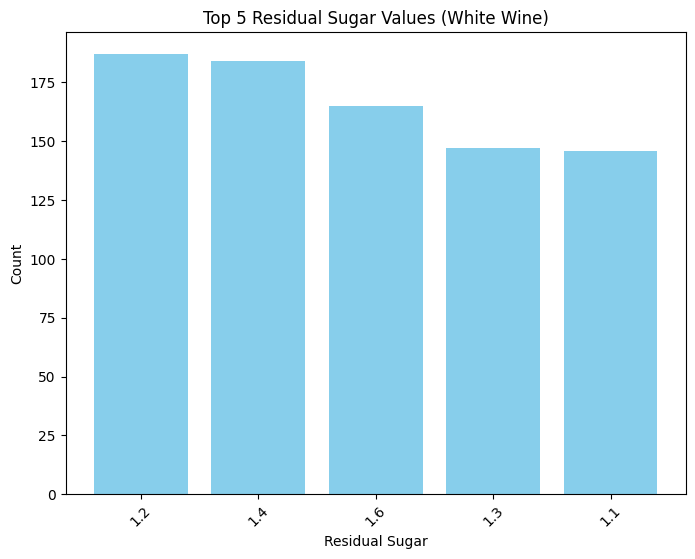

In [14]:
white_sugar_counts=df.loc[df['type']=='white', 'residual sugar'].value_counts().reset_index()

top_ten_sugars=white_sugar_counts['residual sugar'].head(5)
top_ten_sugars=top_ten_sugars.astype('str')
top_ten_sugars_count=white_sugar_counts['count'].head(5)

top_ten_sugars_val=list(top_ten_sugars.values)
top_ten_sugars_val_count=list(top_ten_sugars_count.values)

# Create a bar graph
plt.figure(figsize=(8, 6))
plt.bar(top_ten_sugars_val, top_ten_sugars_val_count, color='skyblue')

# Add labels and title
plt.xlabel('Residual Sugar')
plt.ylabel('Count')
plt.title('Top 5 Residual Sugar Values (White Wine)')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.show()

So.....here we found that the most common value for the freature `residual sugar`, specifically for `white wine` is `1.20`.

In [15]:
df.fillna(value={'residual sugar': 1.20}, inplace=True)

In [16]:
df.isna().sum().reset_index().rename(columns={'index': 'features',
                                                0: 'count'}).sort_values(by=['count'])

features  count
0                   type      0
4         residual sugar      0
6    free sulfur dioxide      0
7   total sulfur dioxide      0
8                density      0
11               alcohol      0
12               quality      0
5              chlorides      2
3            citric acid      3
10             sulphates      4
2       volatile acidity      8
9                     pH      9
1          fixed acidity     10

### 🌟Chlorides

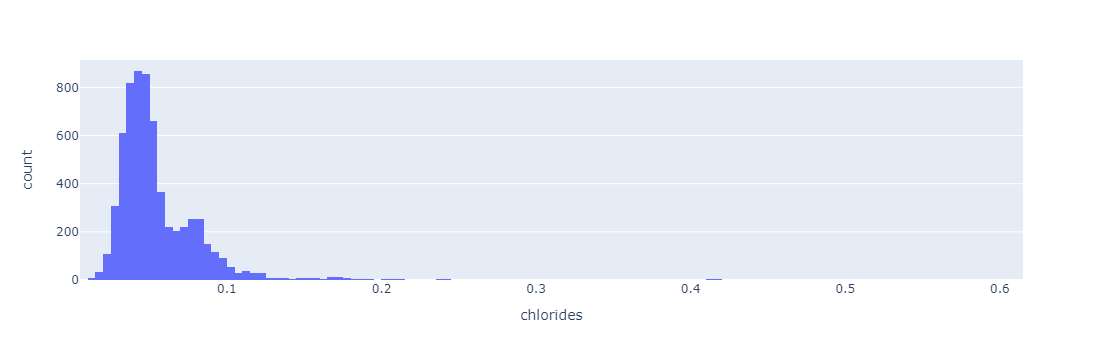

In [17]:
fig = px.histogram(df, x="chlorides")
fig.show()

In [18]:
df['chlorides'].unique()

array([0.045, 0.049, 0.05 , 0.058, 0.044, 0.033, 0.035, 0.04 , 0.032,
       0.046, 0.029, 0.038, 0.074, 0.052, 0.051, 0.047, 0.042, 0.08 ,
       0.053, 0.057, 0.172, 0.173, 0.069, 0.06 , 0.063, 0.066, 0.067,
       0.062, 0.068, 0.147, 0.039, 0.043, 0.048, 0.092, 0.064, 0.041,
       0.056, 0.061, 0.054, 0.034,   nan, 0.059, 0.082, 0.065, 0.026,
       0.02 , 0.036, 0.027, 0.037, 0.055, 0.2  , 0.197, 0.03 , 0.07 ,
       0.031, 0.132, 0.071, 0.028, 0.089, 0.021, 0.108, 0.022, 0.081,
       0.023, 0.073, 0.346, 0.025, 0.09 , 0.114, 0.186, 0.18 , 0.084,
       0.083, 0.096, 0.094, 0.24 , 0.29 , 0.185, 0.024, 0.11 , 0.078,
       0.13 , 0.135, 0.115, 0.072, 0.17 , 0.018, 0.119, 0.126, 0.017,
       0.019, 0.15 , 0.152, 0.088, 0.244, 0.137, 0.093, 0.077, 0.079,
       0.076, 0.201, 0.301, 0.138, 0.169, 0.168, 0.122, 0.167, 0.239,
       0.123, 0.133, 0.211, 0.255, 0.204, 0.208, 0.086, 0.16 , 0.179,
       0.087, 0.217, 0.157, 0.148, 0.158, 0.099, 0.085, 0.091, 0.095,
       0.142, 0.075,

In [19]:
df[df['chlorides'].isna()]

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
98   white            9.8              0.36         0.46            10.5   
747  white            7.2              0.29         0.40             7.6   

     chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
98         NaN                  4.0                  83.0   0.9956  2.89   
747        NaN                 56.0                 177.0   0.9928  3.04   

     sulphates  alcohol  quality  
98        0.30     10.1        4  
747       0.32     11.5        6

Here, we need to find the most common and optimal value to replace the null values, specific for `white wine`

In [20]:
df.loc[df['type']=='white', 'chlorides'].value_counts().reset_index()

chlorides  count
0        0.044    201
1        0.036    200
2        0.042    184
3        0.040    182
4        0.046    181
..         ...    ...
155      0.217      1
156      0.148      1
157      0.158      1
158      0.099      1
159      0.136      1

[160 rows x 2 columns]

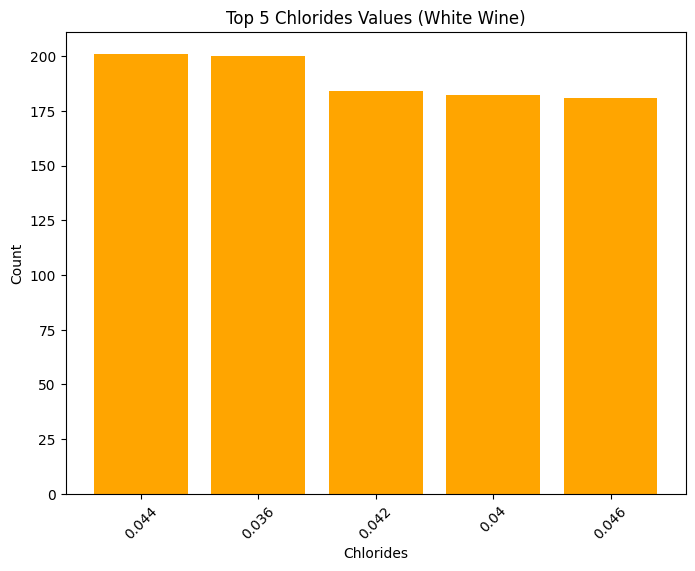

In [21]:
white_sugar_counts=df.loc[df['type']=='white', 'chlorides'].value_counts().reset_index()

top_ten_sugars=white_sugar_counts['chlorides'].head(5)
top_ten_sugars=top_ten_sugars.astype('str')
top_ten_sugars_count=white_sugar_counts['count'].head(5)

top_ten_sugars_val=list(top_ten_sugars.values)
top_ten_sugars_val_count=list(top_ten_sugars_count.values)

# Create a bar graph
plt.figure(figsize=(8, 6))
plt.bar(top_ten_sugars_val, top_ten_sugars_val_count, color='orange')

# Add labels and title
plt.xlabel('Chlorides')
plt.ylabel('Count')
plt.title('Top 5 Chlorides Values (White Wine)')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [22]:
df.fillna(value={'chlorides': 0.044}, inplace=True)

In [23]:
df.isna().sum().reset_index().rename(columns={'index': 'features',
                                                0: 'count'}).sort_values(by=['count'])

features  count
0                   type      0
4         residual sugar      0
5              chlorides      0
6    free sulfur dioxide      0
7   total sulfur dioxide      0
8                density      0
11               alcohol      0
12               quality      0
3            citric acid      3
10             sulphates      4
2       volatile acidity      8
9                     pH      9
1          fixed acidity     10

### 🌟Citric Acid

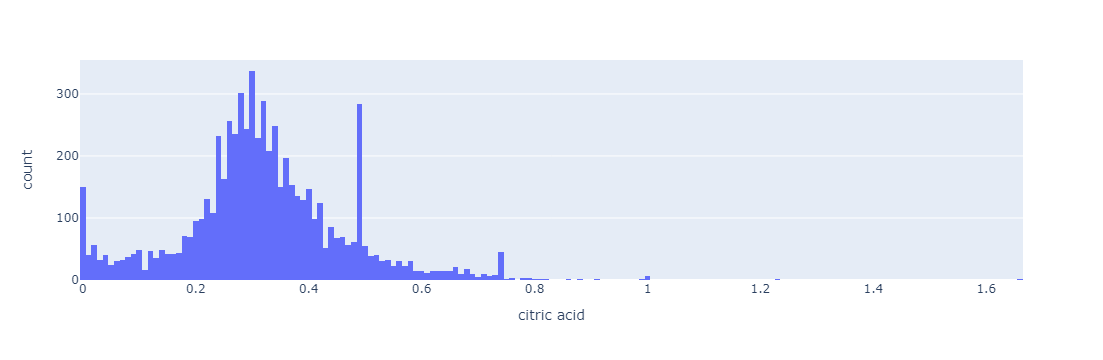

In [24]:
fig = px.histogram(df, x="citric acid")
fig.show()

In [25]:
df[df['citric acid'].isna()]

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
268   white            5.3             0.585          NaN             7.1   
909   white            7.5             0.240          NaN            13.0   
6320    red            7.0             0.540          NaN             2.1   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
268       0.044                 34.0                 145.0   0.9945  3.34   
909       0.049                 46.0                 217.0   0.9985  3.08   
6320      0.079                 39.0                  55.0   0.9956  3.39   

      sulphates  alcohol  quality  
268        0.57      9.7        6  
909        0.53      8.8        5  
6320       0.84     11.4        6

Here, we will find the optimal values for `white wine` and for `red wine`.

In [26]:
df.loc[df['type']=='white', 'citric acid'].value_counts().reset_index()

citric acid  count
0          0.30    307
1          0.28    282
2          0.32    257
3          0.34    225
4          0.29    223
..          ...    ...
82         0.88      1
83         0.99      1
84         1.23      1
85         0.86      1
86         0.11      1

[87 rows x 2 columns]

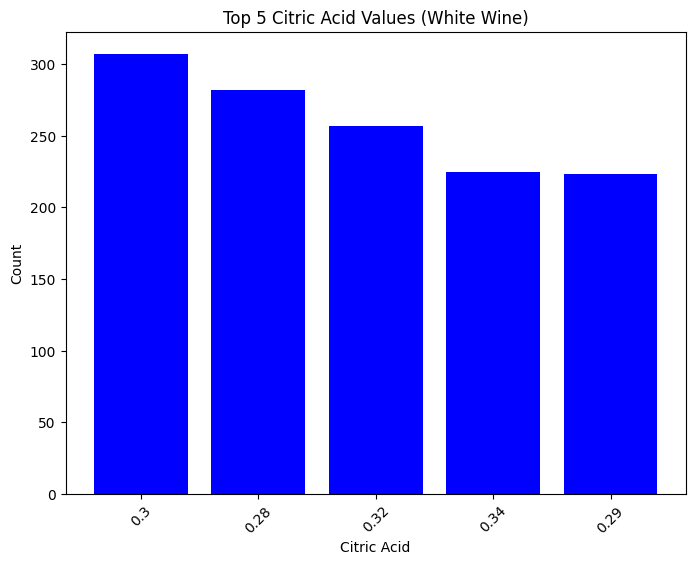

In [27]:
white_sugar_counts=df.loc[df['type']=='white', 'citric acid'].value_counts().reset_index()

top_ten_sugars=white_sugar_counts['citric acid'].head(5)
top_ten_sugars=top_ten_sugars.astype('str')
top_ten_sugars_count=white_sugar_counts['count'].head(5)

top_ten_sugars_val=list(top_ten_sugars.values)
top_ten_sugars_val_count=list(top_ten_sugars_count.values)

# Create a bar graph
plt.figure(figsize=(8, 6))
plt.bar(top_ten_sugars_val, top_ten_sugars_val_count, color='blue')

# Add labels and title
plt.xlabel('Citric Acid')
plt.ylabel('Count')
plt.title('Top 5 Citric Acid Values (White Wine)')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [28]:
df.loc[df['type']=='red', 'citric acid'].value_counts().reset_index()

citric acid  count
0          0.00    131
1          0.49     68
2          0.24     51
3          0.02     50
4          0.26     38
..          ...    ...
75         0.72      1
76         0.62      1
77         0.75      1
78         1.00      1
79         0.78      1

[80 rows x 2 columns]

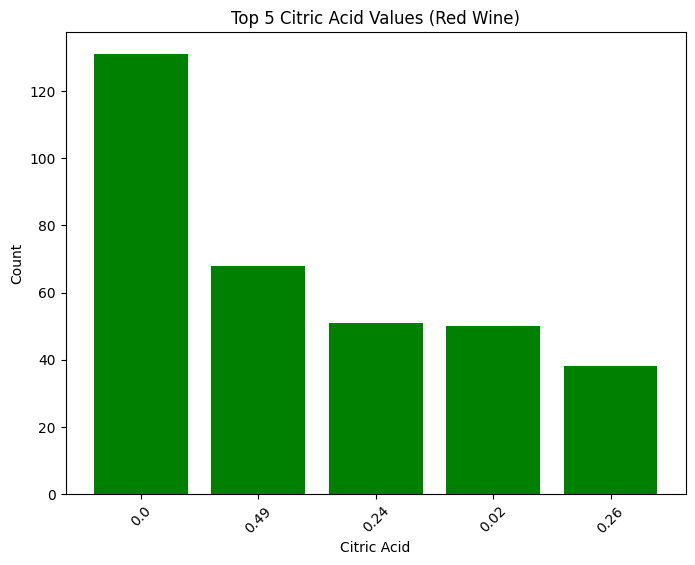

In [29]:
white_sugar_counts=df.loc[df['type']=='red', 'citric acid'].value_counts().reset_index()

top_ten_sugars=white_sugar_counts['citric acid'].head(5)
top_ten_sugars=top_ten_sugars.astype('str')
top_ten_sugars_count=white_sugar_counts['count'].head(5)

top_ten_sugars_val=list(top_ten_sugars.values)
top_ten_sugars_val_count=list(top_ten_sugars_count.values)

# Create a bar graph
plt.figure(figsize=(8, 6))
plt.bar(top_ten_sugars_val, top_ten_sugars_val_count, color='green')

# Add labels and title
plt.xlabel('Citric Acid')
plt.ylabel('Count')
plt.title('Top 5 Citric Acid Values (Red Wine)')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [30]:
df['citric acid'].iloc[268]=0.3
df['citric acid'].iloc[909]=0.3
df['citric acid'].iloc[6320]=0.0

In [31]:
df.isna().sum().reset_index().rename(columns={'index': 'features',
                                                0: 'count'}).sort_values(by=['count'])

features  count
0                   type      0
3            citric acid      0
4         residual sugar      0
5              chlorides      0
6    free sulfur dioxide      0
7   total sulfur dioxide      0
8                density      0
11               alcohol      0
12               quality      0
10             sulphates      4
2       volatile acidity      8
9                     pH      9
1          fixed acidity     10

### 🌟Sulphates

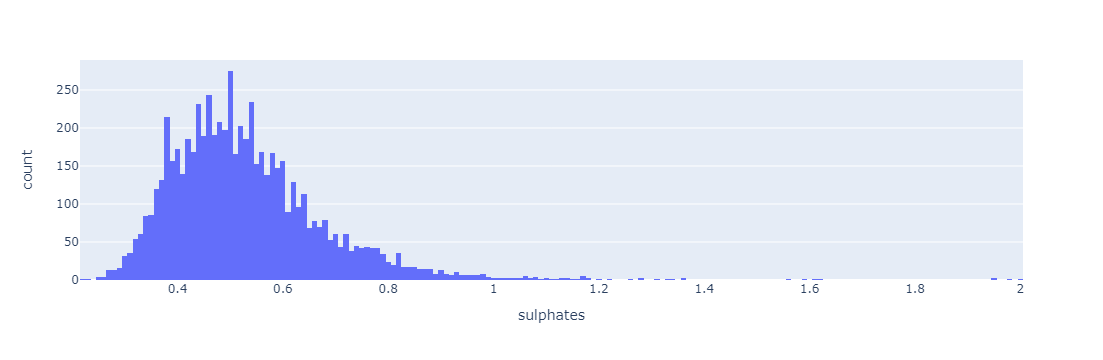

In [32]:
fig = px.histogram(df, x="sulphates")
fig.show()

In [33]:
df[df['sulphates'].isna()]

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
224   white            6.3             0.495         0.22             1.8   
2902  white            NaN             0.360         0.14             8.9   
6321    red            6.4             0.530         0.09             3.9   
6493    red            5.9             0.550         0.10             2.2   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
224       0.046                 31.0                 140.0  0.99290  3.39   
2902      0.036                 38.0                 155.0  0.99622  3.27   
6321      0.123                 14.0                  31.0  0.99680  3.50   
6493      0.062                 39.0                  51.0  0.99512  3.52   

      sulphates  alcohol  quality  
224         NaN     10.4        6  
2902        NaN      9.4        5  
6321        NaN     11.0        4  
6493        NaN     11.2        6

In [34]:
df.loc[df['type']=='white', 'sulphates'].value_counts().reset_index()

sulphates  count
0        0.50    248
1        0.46    225
2        0.44    216
3        0.38    214
4        0.42    181
..        ...    ...
74       0.99      1
75       0.22      1
76       0.23      1
77       1.01      1
78       1.08      1

[79 rows x 2 columns]

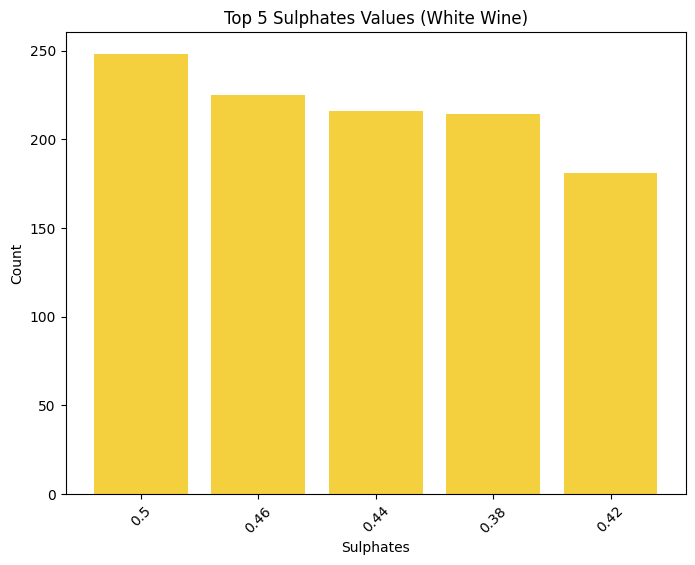

In [35]:
white_sugar_counts=df.loc[df['type']=='white', 'sulphates'].value_counts().reset_index()

top_ten_sugars=white_sugar_counts['sulphates'].head(5)
top_ten_sugars=top_ten_sugars.astype('str')
top_ten_sugars_count=white_sugar_counts['count'].head(5)

top_ten_sugars_val=list(top_ten_sugars.values)
top_ten_sugars_val_count=list(top_ten_sugars_count.values)

# Create a bar graph
plt.figure(figsize=(8, 6))
plt.bar(top_ten_sugars_val, top_ten_sugars_val_count, color='#F4D03F')

# Add labels and title
plt.xlabel('Sulphates')
plt.ylabel('Count')
plt.title('Top 5 Sulphates Values (White Wine)')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [36]:
df.loc[df['type']=='red', 'sulphates'].value_counts().reset_index()

sulphates  count
0        0.60     69
1        0.58     68
2        0.54     68
3        0.62     61
4        0.56     60
..        ...    ...
91       1.00      1
92       1.59      1
93       0.33      1
94       1.26      1
95       1.01      1

[96 rows x 2 columns]

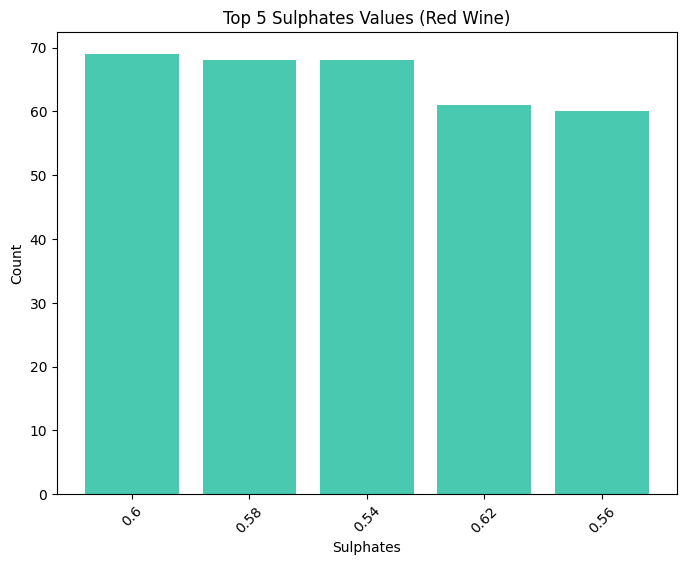

In [37]:
white_sugar_counts=df.loc[df['type']=='red', 'sulphates'].value_counts().reset_index()

top_ten_sugars=white_sugar_counts['sulphates'].head(5)
top_ten_sugars=top_ten_sugars.astype('str')
top_ten_sugars_count=white_sugar_counts['count'].head(5)

top_ten_sugars_val=list(top_ten_sugars.values)
top_ten_sugars_val_count=list(top_ten_sugars_count.values)

# Create a bar graph
plt.figure(figsize=(8, 6))
plt.bar(top_ten_sugars_val, top_ten_sugars_val_count, color='#48C9B0')

# Add labels and title
plt.xlabel('Sulphates')
plt.ylabel('Count')
plt.title('Top 5 Sulphates Values (Red Wine)')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [38]:
df[df['sulphates'].isna()].index

Index([224, 2902, 6321, 6493], dtype='int64')

In [39]:
df['sulphates'].iloc[224]=0.5
df['sulphates'].iloc[2902]=0.5
df['sulphates'].iloc[6321]=0.6
df['sulphates'].iloc[6493]=0.6

In [40]:
df.isna().sum().reset_index().rename(columns={'index': 'features',
                                                0: 'count'}).sort_values(by=['count'])

features  count
0                   type      0
3            citric acid      0
4         residual sugar      0
5              chlorides      0
6    free sulfur dioxide      0
7   total sulfur dioxide      0
8                density      0
10             sulphates      0
11               alcohol      0
12               quality      0
2       volatile acidity      8
9                     pH      9
1          fixed acidity     10

### 🌟Volatile Acidity

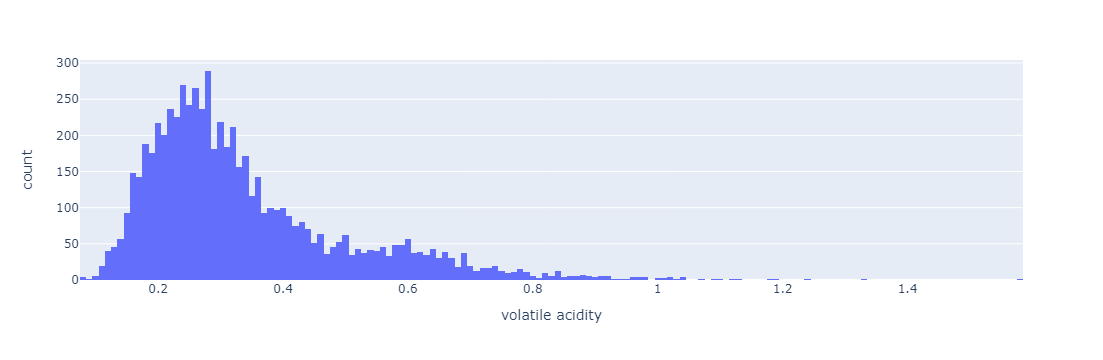

In [41]:
fig = px.histogram(df, x="volatile acidity")
fig.show()

In [42]:
df[df['volatile acidity'].isna()]

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
86    white            7.2               NaN         0.63            11.0   
521   white            7.9               NaN         0.26             2.1   
621   white            6.5               NaN         0.43             8.9   
812   white            6.4               NaN         0.28             1.1   
1079  white            NaN               NaN         0.29             6.2   
2894  white            6.4               NaN         0.36             1.4   
4895  white            6.5               NaN         0.19             1.2   
6486    red            7.2               NaN         0.33             2.5   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
86        0.044                 55.0                 156.0  0.99740  3.09   
521       0.039                  8.0                 143.0  0.99420  3.05   
621       0.083                 50.0                 171.0  0.99650  2.85   
812       0.055                  9.0                 160.0  0.99405  3.42   
1079      0.046                 29.0                 227.0  0.99520  3.29   
2894      0.044                 22.0                  68.0  0.99014  3.15   
4895      0.041                 30.0                 111.0  0.99254  2.99   
6486      0.068                 34.0                 102.0  0.99414  3.27   

      sulphates  alcohol  quality  
86         0.44      8.7        6  
521        0.74      9.8        5  
621        0.50      9.0        5  
812        0.50      9.1        7  
1079       0.53     10.1        6  
2894       0.50     11.7        7  
4895       0.46      9.4        6  
6486       0.78     12.8        6

In [43]:
df.loc[df['type']=='white', 'volatile acidity'].value_counts().reset_index()

volatile acidity  count
0               0.280    263
1               0.240    252
2               0.260    239
3               0.250    231
4               0.220    229
..                ...    ...
120             0.545      1
121             0.135      1
122             0.905      1
123             0.685      1
124             0.355      1

[125 rows x 2 columns]

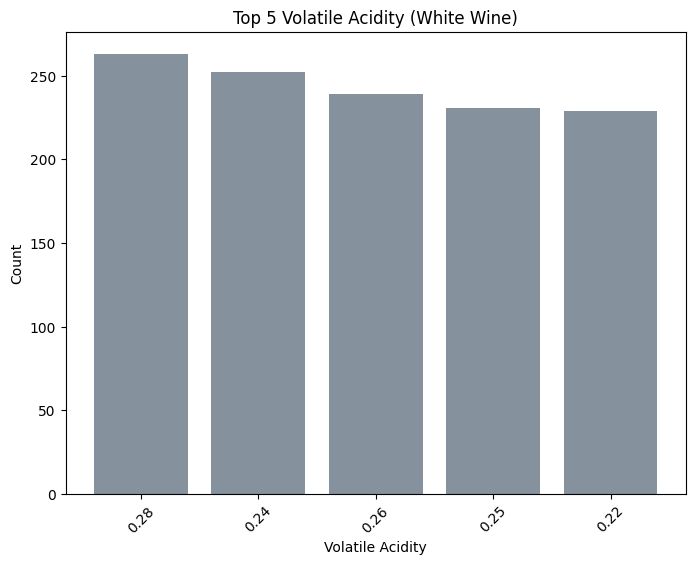

In [44]:
white_sugar_counts=df.loc[df['type']=='white', 'volatile acidity'].value_counts().reset_index()

top_ten_sugars=white_sugar_counts['volatile acidity'].head(5)
top_ten_sugars=top_ten_sugars.astype('str')
top_ten_sugars_count=white_sugar_counts['count'].head(5)

top_ten_sugars_val=list(top_ten_sugars.values)
top_ten_sugars_val_count=list(top_ten_sugars_count.values)

# Create a bar graph
plt.figure(figsize=(8, 6))
plt.bar(top_ten_sugars_val, top_ten_sugars_val_count, color='#85929E')

# Add labels and title
plt.xlabel('Volatile Acidity')
plt.ylabel('Count')
plt.title('Top 5 Volatile Acidity (White Wine)')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [45]:
df.fillna(value={'volatile acidity':0.28}, inplace=True)

In [46]:
df.isna().sum().reset_index().rename(columns={'index': 'features',
                                                0: 'count'}).sort_values(by=['count'])

features  count
0                   type      0
2       volatile acidity      0
3            citric acid      0
4         residual sugar      0
5              chlorides      0
6    free sulfur dioxide      0
7   total sulfur dioxide      0
8                density      0
10             sulphates      0
11               alcohol      0
12               quality      0
9                     pH      9
1          fixed acidity     10

### 🌟PH

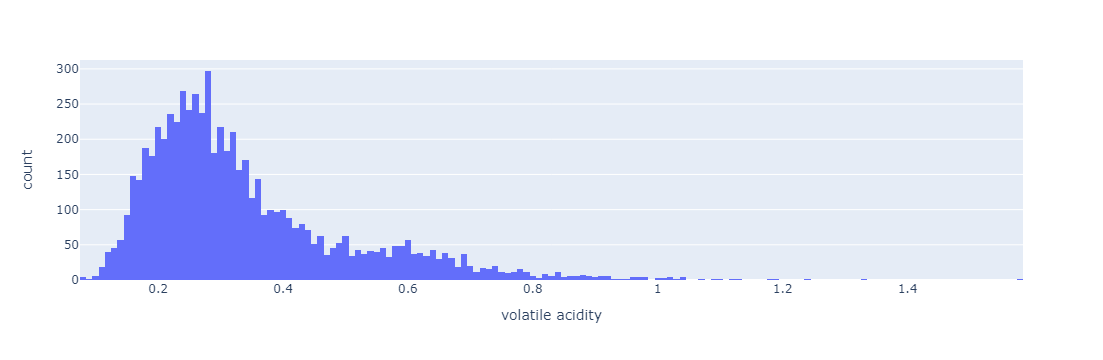

In [47]:
fig = px.histogram(df, x="volatile acidity")
fig.show()

In [48]:
df[df['pH'].isna()]

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
54    white            6.8             0.200         0.59             0.9   
139   white            8.1             0.280         0.39             1.9   
440   white            6.7             0.220         0.37             1.6   
587   white            6.1             0.320         0.25             1.7   
697   white            7.5             0.310         0.51            14.8   
972   white            6.8             0.220         0.35            17.5   
4892  white            6.5             0.230         0.38             1.3   
6428    red            NaN             0.440         0.09             2.2   
6429    red            NaN             0.705         0.10             2.8   

      chlorides  free sulfur dioxide  total sulfur dioxide  density  pH  \
54        0.147                 38.0                 132.0  0.99300 NaN   
139       0.029                 18.0                  79.0  0.99230 NaN   
440       0.028                 24.0                 102.0  0.99130 NaN   
587       0.034                 37.0                 136.0  0.99200 NaN   
697       0.039                 62.0                 204.0  0.99820 NaN   
972       0.039                 38.0                 153.0  0.99940 NaN   
4892      0.032                 29.0                 112.0  0.99298 NaN   
6428      0.063                  9.0                  18.0  0.99444 NaN   
6429      0.081                 13.0                  28.0  0.99631 NaN   

      sulphates  alcohol  quality  
54         0.38      9.1        6  
139        0.52     11.8        6  
440        0.59     11.6        7  
587        0.50     10.8        7  
697        0.60      9.5        5  
972        0.42      9.0        6  
4892       0.54      9.7        5  
6428       0.69     11.3        6  
6429       0.66     10.2        5

In [49]:
df.loc[df['type']=='white', 'pH'].value_counts().reset_index()

pH  count
0    3.14    172
1    3.16    164
2    3.22    146
3    3.19    145
4    3.18    138
..    ...    ...
98   2.74      1
99   2.72      1
100  3.82      1
101  3.62      1
102  3.67      1

[103 rows x 2 columns]

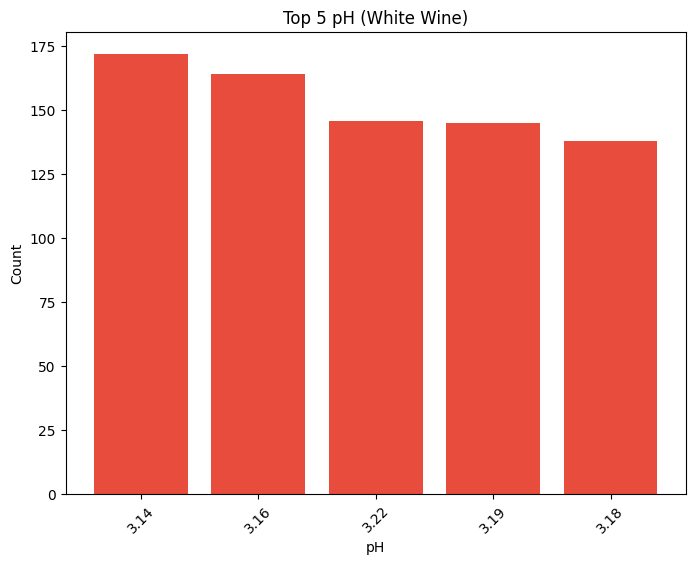

In [50]:
white_sugar_counts=df.loc[df['type']=='white', 'pH'].value_counts().reset_index()

top_ten_sugars=white_sugar_counts['pH'].head(5)
top_ten_sugars=top_ten_sugars.astype('str')
top_ten_sugars_count=white_sugar_counts['count'].head(5)

top_ten_sugars_val=list(top_ten_sugars.values)
top_ten_sugars_val_count=list(top_ten_sugars_count.values)

# Create a bar graph
plt.figure(figsize=(8, 6))
plt.bar(top_ten_sugars_val, top_ten_sugars_val_count, color='#E74C3C')

# Add labels and title
plt.xlabel('pH')
plt.ylabel('Count')
plt.title('Top 5 pH (White Wine)')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [51]:
df.fillna(value={'pH':3.14}, inplace=True)

In [52]:
df.isna().sum().reset_index().rename(columns={'index': 'features',
                                                0: 'count'}).sort_values(by=['count'])

features  count
0                   type      0
2       volatile acidity      0
3            citric acid      0
4         residual sugar      0
5              chlorides      0
6    free sulfur dioxide      0
7   total sulfur dioxide      0
8                density      0
9                     pH      0
10             sulphates      0
11               alcohol      0
12               quality      0
1          fixed acidity     10

### 🌟Fixed Acidity

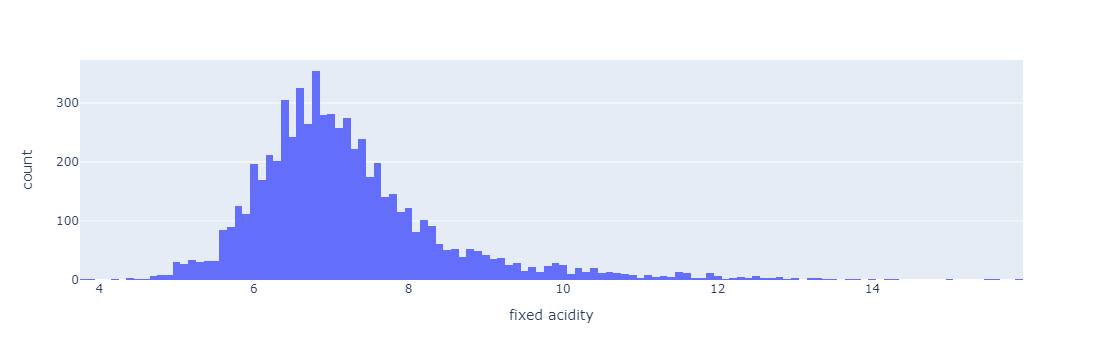

In [53]:
fig = px.histogram(df, x="fixed acidity")
fig.show()

In [54]:
df[df['fixed acidity'].isna()]

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
17    white            NaN             0.660         0.48             1.2   
174   white            NaN             0.270         0.31            17.7   
249   white            NaN             0.410         0.14            10.4   
267   white            NaN             0.580         0.07             6.9   
368   white            NaN             0.290         0.48             2.3   
518   white            NaN             0.130         0.28             1.9   
1079  white            NaN             0.280         0.29             6.2   
2902  white            NaN             0.360         0.14             8.9   
6428    red            NaN             0.440         0.09             2.2   
6429    red            NaN             0.705         0.10             2.8   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
17        0.029                 29.0                  75.0  0.98920  3.33   
174       0.051                 33.0                 173.0  0.99900  3.09   
249       0.037                 18.0                 119.0  0.99600  3.38   
267       0.043                 34.0                 149.0  0.99440  3.34   
368       0.049                 36.0                 178.0  0.99310  3.17   
518       0.050                 20.0                  78.0  0.99180  3.43   
1079      0.046                 29.0                 227.0  0.99520  3.29   
2902      0.036                 38.0                 155.0  0.99622  3.27   
6428      0.063                  9.0                  18.0  0.99444  3.14   
6429      0.081                 13.0                  28.0  0.99631  3.14   

      sulphates  alcohol  quality  
17         0.39     12.8        8  
174        0.64     10.2        5  
249        0.45     10.0        5  
267        0.57      9.7        5  
368        0.64     10.6        6  
518        0.64     10.8        6  
1079       0.53     10.1        6  
2902       0.50      9.4        5  
6428       0.69     11.3        6  
6429       0.66     10.2        5

In [55]:
df.loc[df['type']=='white', 'fixed acidity'].value_counts().reset_index()

fixed acidity  count
0             6.8    308
1             6.6    290
2             6.4    280
3             6.9    241
4             6.7    236
..            ...    ...
63            4.5      1
64            4.6      1
65           11.8      1
66           14.2      1
67            3.9      1

[68 rows x 2 columns]

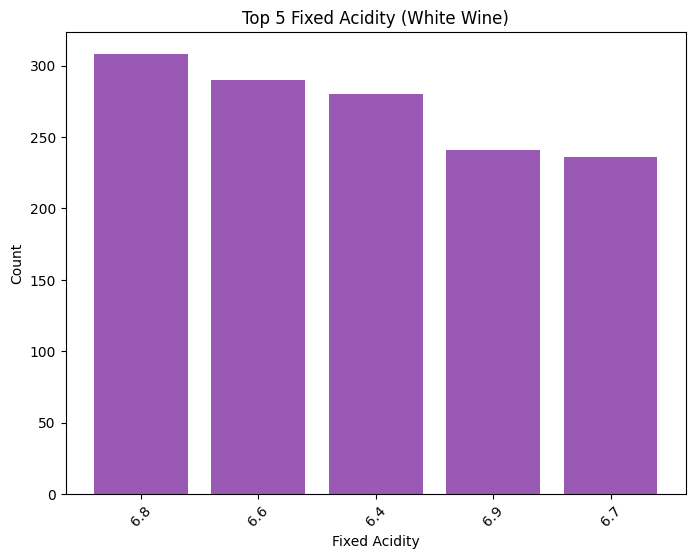

In [56]:
white_sugar_counts=df.loc[df['type']=='white', 'fixed acidity'].value_counts().reset_index()

top_ten_sugars=white_sugar_counts['fixed acidity'].head(5)
top_ten_sugars=top_ten_sugars.astype('str')
top_ten_sugars_count=white_sugar_counts['count'].head(5)

top_ten_sugars_val=list(top_ten_sugars.values)
top_ten_sugars_val_count=list(top_ten_sugars_count.values)

# Create a bar graph
plt.figure(figsize=(8, 6))
plt.bar(top_ten_sugars_val, top_ten_sugars_val_count, color='#9B59B6')

# Add labels and title
plt.xlabel('Fixed Acidity')
plt.ylabel('Count')
plt.title('Top 5 Fixed Acidity (White Wine)')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [57]:
df.fillna(value={'fixed acidity': 6.8}, inplace=True)

In [58]:
df.isna().sum().reset_index().rename(columns={'index': 'features',
                                                0: 'count'}).sort_values(by=['count'])

features  count
0                   type      0
1          fixed acidity      0
2       volatile acidity      0
3            citric acid      0
4         residual sugar      0
5              chlorides      0
6    free sulfur dioxide      0
7   total sulfur dioxide      0
8                density      0
9                     pH      0
10             sulphates      0
11               alcohol      0
12               quality      0

### We are done with our cleaning Process 😎

<Axes: xlabel='quality', ylabel='count'>

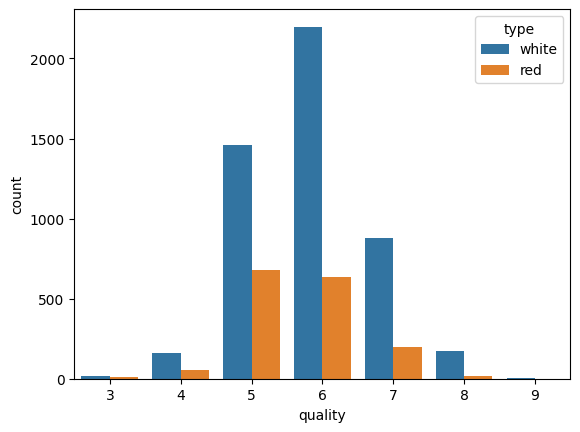

In [59]:
sns.countplot(df, x="quality", hue="type")

---
## 🍀Outlier Detection & Handling

<Axes: >

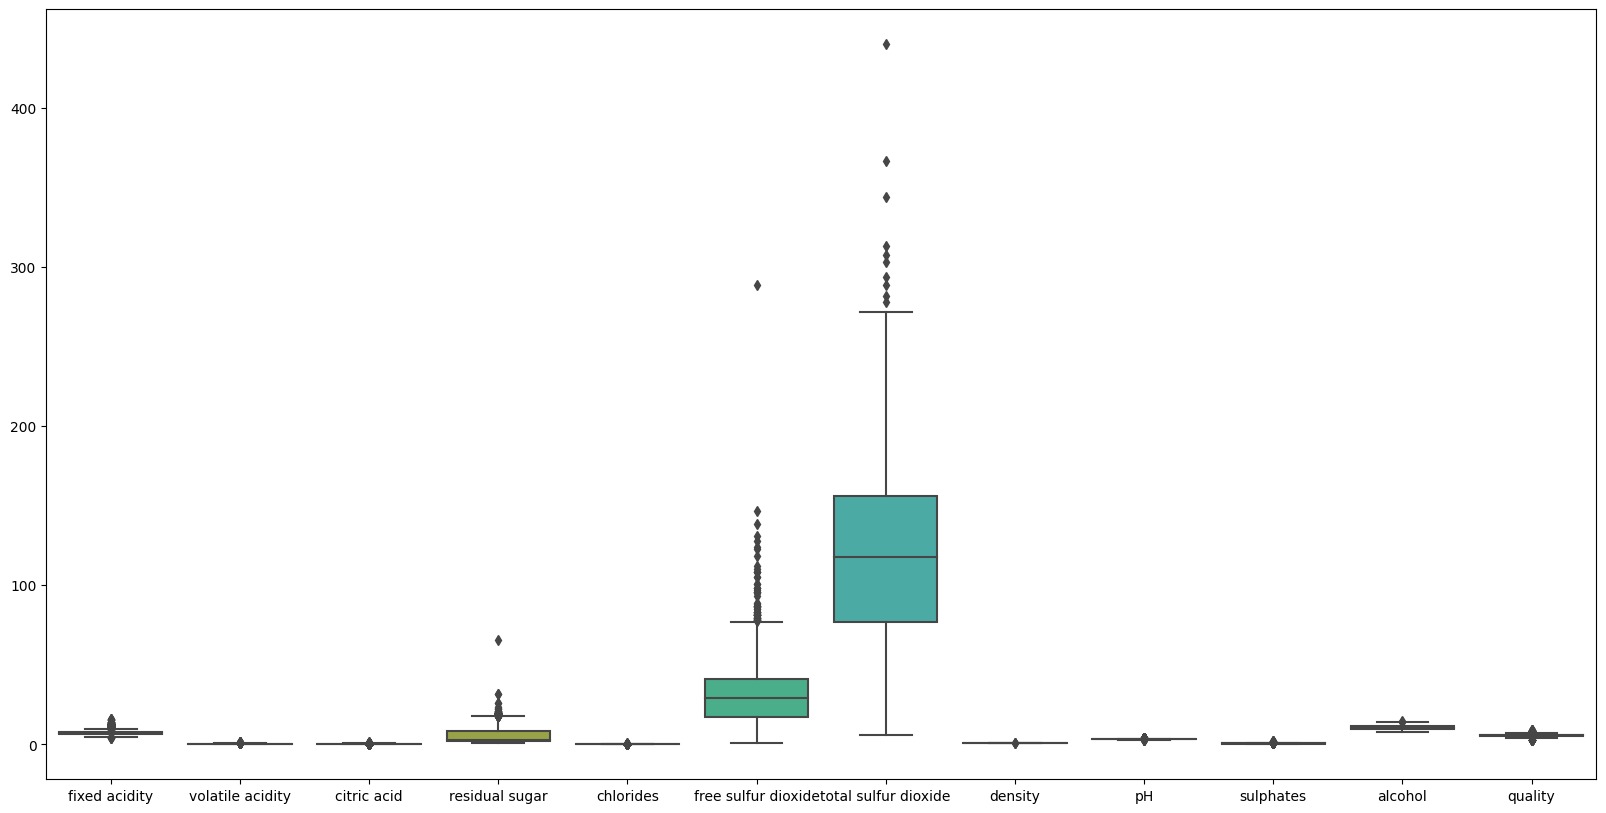

In [60]:
plt.figure(figsize=(20,10))
sns.boxplot(df)

Here we can see that there are some outliers in the features `free sulfur dioxide & total sulfur dioxide`, so i am going to remove those by using the methode of `Inter Quartile Range` and `Capping`. 🤓

### 🌟Free Sulphur Dioxide

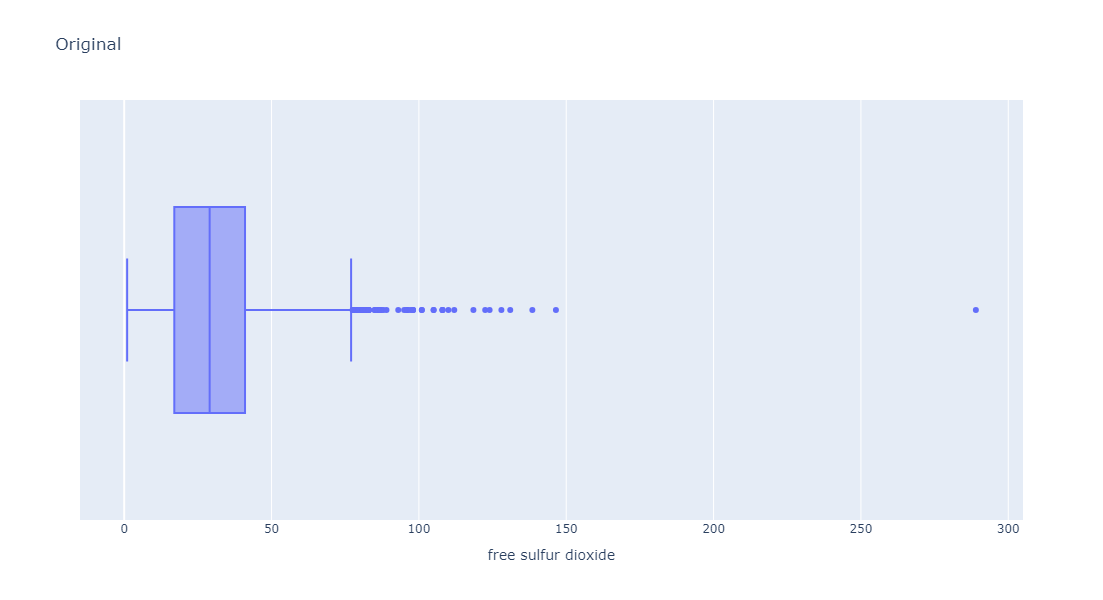

In [61]:
fig=px.box(df, x='free sulfur dioxide',
             title="Original", orientation='h')
fig.update_layout(height=600)
fig.show()

In [62]:
q1=df['free sulfur dioxide'].quantile(0.25)
q3=df['free sulfur dioxide'].quantile(0.75)
iqr=q3-q1
print("Q1:{} & Q2:{} & IQR:{}".format(q1,q3,iqr))

ul=q3+1.5*iqr
ll=q1-1.5*iqr
print("Up:{} & Low:{}".format(ul,ll))

Q1:17.0 & Q2:41.0 & IQR:24.0
Up:77.0 & Low:-19.0


In [63]:
df_iqr_out=df.loc[(df['free sulfur dioxide']>ul) | (df['free sulfur dioxide']<ll)]
df_iqr_out

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
67    white            6.7              0.25         0.13             1.2   
297   white            7.2              0.19         0.46             3.8   
325   white            7.5              0.27         0.31             5.8   
387   white            6.3              0.39         0.35             5.9   
395   white            6.8              0.27         0.12             1.3   
...     ...            ...               ...          ...             ...   
4179  white            6.9              0.24         0.40            15.4   
4185  white            6.9              0.24         0.40            15.4   
4523  white            6.7              0.18         0.25            14.3   
4745  white            6.1              0.26         0.25             2.9   
4841  white            5.7              0.22         0.25             1.1   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
67        0.041                 81.0                 174.0  0.99200  3.14   
297       0.041                 82.0                 187.0  0.99320  3.19   
325       0.057                131.0                 313.0  0.99460  3.18   
387       0.040                 82.5                 260.0  0.99410  3.12   
395       0.040                 87.0                 168.0  0.99200  3.18   
...         ...                  ...                   ...      ...   ...   
4179      0.052                 81.0                 198.0  0.99860  3.20   
4185      0.052                 81.0                 198.0  0.99860  3.20   
4523      0.048                 79.0                 149.0  0.99750  3.12   
4745      0.047                289.0                 440.0  0.99314  3.44   
4841      0.050                 97.0                 175.0  0.99099  3.44   

      sulphates  alcohol  quality  
67         0.42      9.8        5  
297        0.60     11.2        7  
325        0.59     10.5        5  
387        0.66     10.1        5  
395        0.41     10.0        5  
...         ...      ...      ...  
4179       0.69      9.4        5  
4185       0.69      9.4        5  
4523       0.37      9.7        5  
4745       0.64     10.5        3  
4841       0.62     11.1        6  

[62 rows x 13 columns]

In [64]:
df_iqr_out.shape

(62, 13)

#### Capping the Outliers

In [65]:
df.loc[(df['free sulfur dioxide']>ul), 'free sulfur dioxide']=ul
df.loc[(df['free sulfur dioxide']<ll), 'free sulfur dioxide']=ll

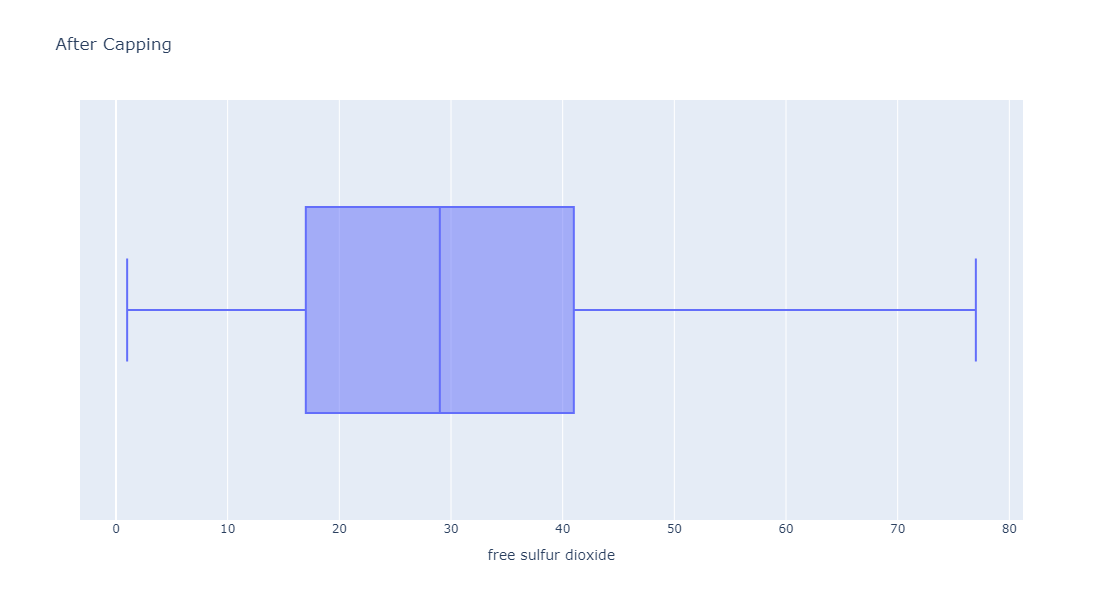

In [66]:
fig=px.box(df, x='free sulfur dioxide',
             title="After Capping", orientation='h')
fig.update_layout(height=600)
fig.show()

### 🌟Total Sulfur Dioxide

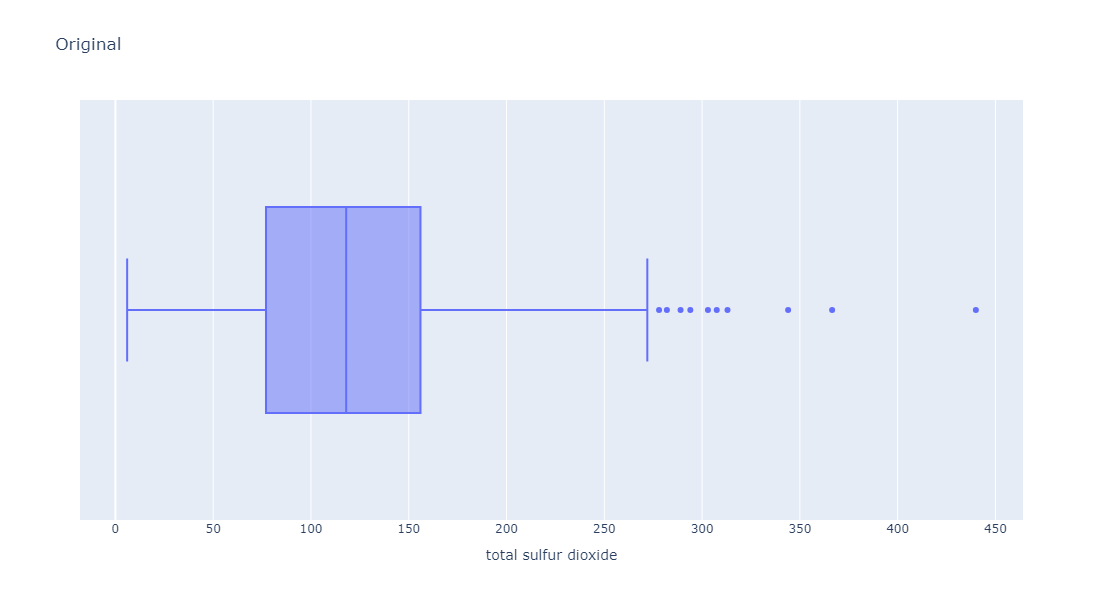

In [67]:
fig=px.box(df, x='total sulfur dioxide',
             title="Original", orientation='h')
fig.update_layout(height=600)
fig.show()

In [68]:
q1=df['total sulfur dioxide'].quantile(0.25)
q3=df['total sulfur dioxide'].quantile(0.75)
iqr=q3-q1
print("Q1:{} & Q2:{} & IQR:{}".format(q1,q3,iqr))

ul=q3+1.5*iqr
ll=q1-1.5*iqr
print("Up:{} & Low:{}".format(ul,ll))

Q1:77.0 & Q2:156.0 & IQR:79.0
Up:274.5 & Low:-41.5


In [69]:
df_iqr_out=df.loc[(df['total sulfur dioxide']>ul) | (df['total sulfur dioxide']<ll)]
df_iqr_out

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
325   white            7.5              0.27         0.31            5.80   
1417  white            8.6              0.55         0.35           15.55   
1931  white            7.1              0.49         0.22            2.00   
2127  white            9.1              0.33         0.38            1.70   
2378  white            9.4              0.23         0.56           16.45   
2654  white            6.9              0.40         0.22            5.95   
3152  white            7.6              0.25         1.23            4.60   
4745  white            6.1              0.26         0.25            2.90   
5977    red            7.9              0.30         0.68            8.30   
5979    red            7.9              0.30         0.68            8.30   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
325       0.057                 77.0                 313.0  0.99460  3.18   
1417      0.057                 35.5                 366.5  1.00010  3.04   
1931      0.047                 77.0                 307.5  0.99240  3.24   
2127      0.062                 50.5                 344.0  0.99580  3.10   
2378      0.063                 52.5                 282.0  1.00098  3.10   
2654      0.081                 76.0                 303.0  0.99705  3.40   
3152      0.035                 51.0                 294.0  0.99018  3.03   
4745      0.047                 77.0                 440.0  0.99314  3.44   
5977      0.050                 37.5                 278.0  0.99316  3.01   
5979      0.050                 37.5                 289.0  0.99316  3.01   

      sulphates  alcohol  quality  
325        0.59     10.5        5  
1417       0.63     11.0        3  
1931       0.37     11.0        3  
2127       0.70      9.5        5  
2378       0.51      9.3        5  
2654       0.57      9.4        5  
3152       0.43     13.1        6  
4745       0.64     10.5        3  
5977       0.51     12.3        7  
5979       0.51     12.3        7

In [70]:
df_iqr_out.shape

(10, 13)

#### Capping the Outliers

In [71]:
df.loc[(df['total sulfur dioxide']>ul), 'total sulfur dioxide']=ul
df.loc[(df['total sulfur dioxide']<ll), 'total sulfur dioxide']=ll

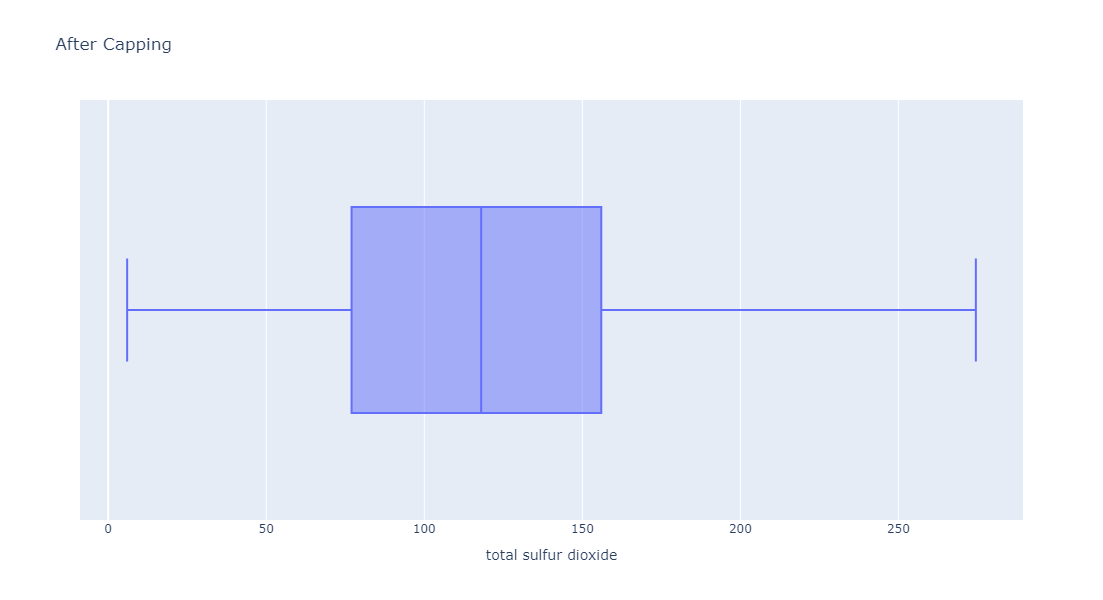

In [72]:
fig=px.box(df, x='total sulfur dioxide',
             title="After Capping", orientation='h')
fig.update_layout(height=600)
fig.show()

<Figure size 2000x1200 with 0 Axes>

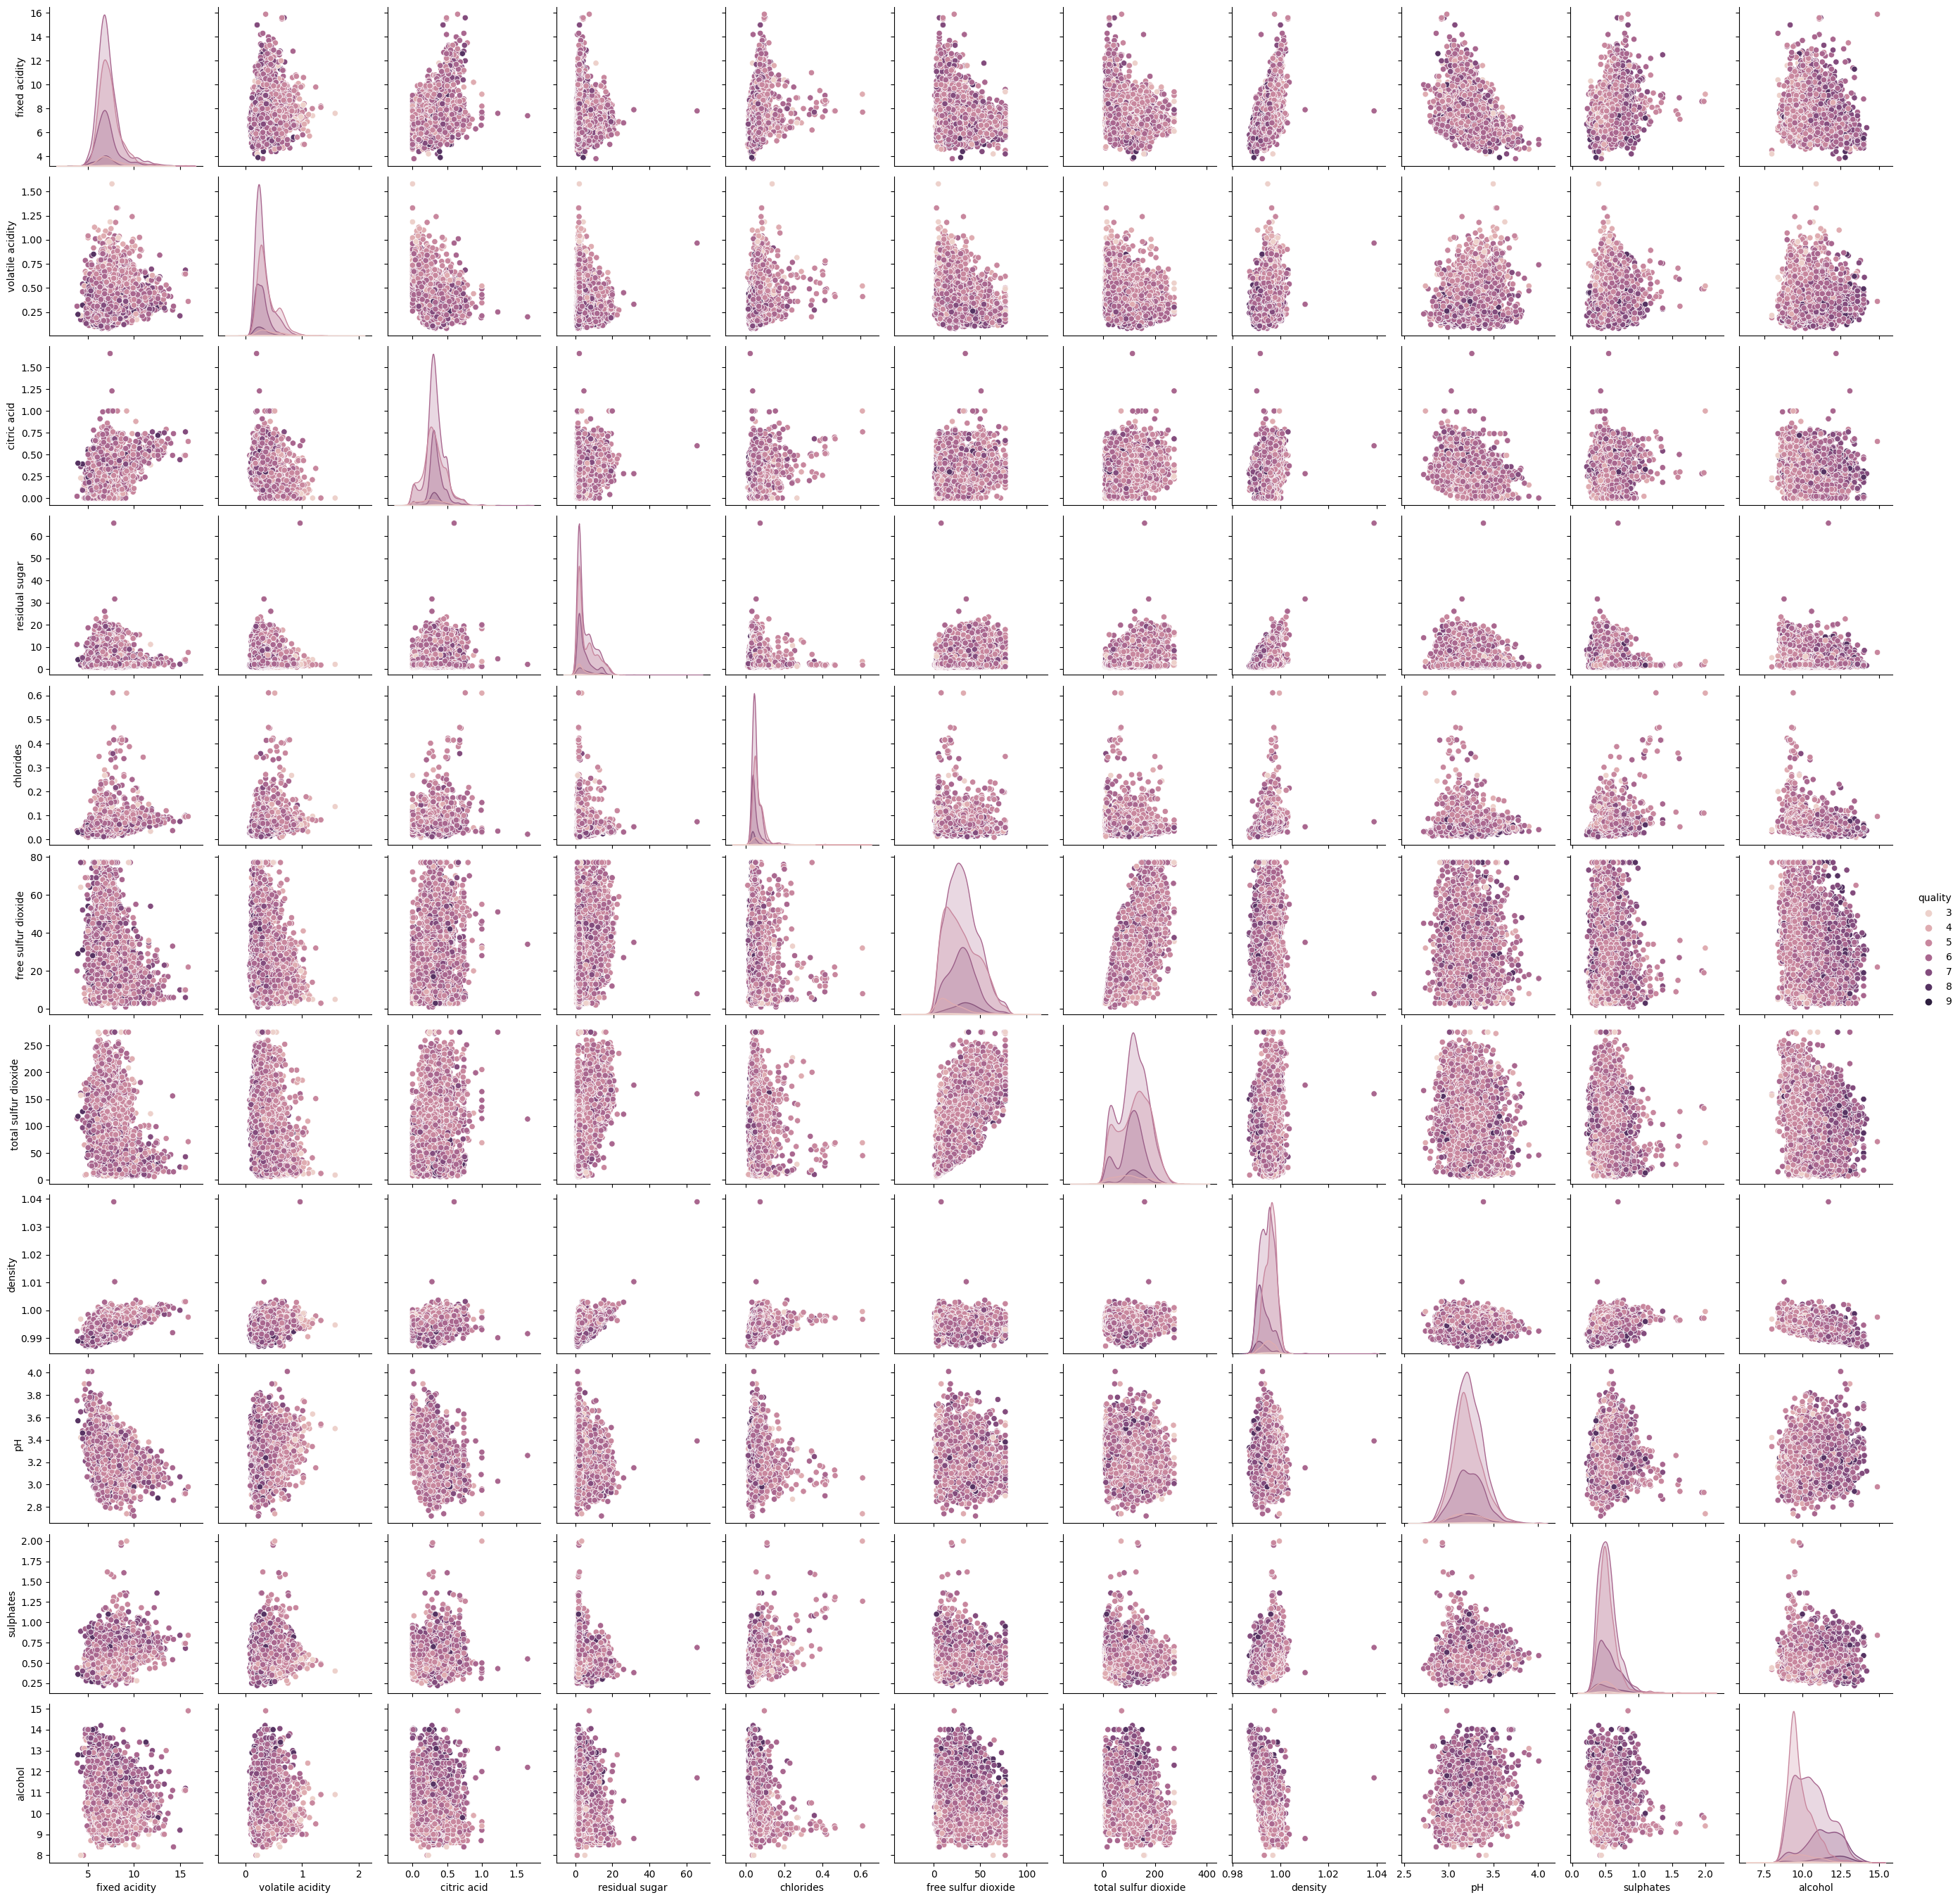

In [73]:
plt.figure(figsize=(20,12))
sns.pairplot(df, hue='quality')

---
## 🍀Encoding the Categorical Features

In [74]:
df.select_dtypes(include='object')

type
0     white
1     white
2     white
3     white
4     white
...     ...
6492    red
6493    red
6494    red
6495    red
6496    red

[6497 rows x 1 columns]

In [75]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()
fa=ohe.fit_transform(df[['type']]).toarray()
fl=ohe.categories_
fh=np.array(fl).ravel()
df_type=pd.DataFrame(data=fa, columns=fh)
df_type

red  white
0     0.0    1.0
1     0.0    1.0
2     0.0    1.0
3     0.0    1.0
4     0.0    1.0
...   ...    ...
6492  1.0    0.0
6493  1.0    0.0
6494  1.0    0.0
6495  1.0    0.0
6496  1.0    0.0

[6497 rows x 2 columns]

In [76]:
df_type.drop('red', axis=1, inplace=True)

In [77]:
df=pd.concat([df, df_type], axis=1)

In [78]:
df

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0     white            7.0             0.270         0.36            20.7   
1     white            6.3             0.300         0.34             1.6   
2     white            8.1             0.280         0.40             6.9   
3     white            7.2             0.230         0.32             8.5   
4     white            7.2             0.230         0.32             8.5   
...     ...            ...               ...          ...             ...   
6492    red            6.2             0.600         0.08             2.0   
6493    red            5.9             0.550         0.10             2.2   
6494    red            6.3             0.510         0.13             2.3   
6495    red            5.9             0.645         0.12             2.0   
6496    red            6.0             0.310         0.47             3.6   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0         0.045                 45.0                 170.0  1.00100  3.00   
1         0.049                 14.0                 132.0  0.99400  3.30   
2         0.050                 30.0                  97.0  0.99510  3.26   
3         0.058                 47.0                 186.0  0.99560  3.19   
4         0.058                 47.0                 186.0  0.99560  3.19   
...         ...                  ...                   ...      ...   ...   
6492      0.090                 32.0                  44.0  0.99490  3.45   
6493      0.062                 39.0                  51.0  0.99512  3.52   
6494      0.076                 29.0                  40.0  0.99574  3.42   
6495      0.075                 32.0                  44.0  0.99547  3.57   
6496      0.067                 18.0                  42.0  0.99549  3.39   

      sulphates  alcohol  quality  white  
0          0.45      8.8        6    1.0  
1          0.49      9.5        6    1.0  
2          0.44     10.1        6    1.0  
3          0.40      9.9        6    1.0  
4          0.40      9.9        6    1.0  
...         ...      ...      ...    ...  
6492       0.58     10.5        5    0.0  
6493       0.60     11.2        6    0.0  
6494       0.75     11.0        6    0.0  
6495       0.71     10.2        5    0.0  
6496       0.66     11.0        6    0.0  

[6497 rows x 14 columns]

In [79]:
df.drop('type', axis=1, inplace=True)

In [80]:
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0             0.270         0.36            20.7      0.045   
1               6.3             0.300         0.34             1.6      0.049   
2               8.1             0.280         0.40             6.9      0.050   
3               7.2             0.230         0.32             8.5      0.058   
4               7.2             0.230         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
6492            6.2             0.600         0.08             2.0      0.090   
6493            5.9             0.550         0.10             2.2      0.062   
6494            6.3             0.510         0.13             2.3      0.076   
6495            5.9             0.645         0.12             2.0      0.075   
6496            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    45.0                 170.0  1.00100  3.00       0.45   
1                    14.0                 132.0  0.99400  3.30       0.49   
2                    30.0                  97.0  0.99510  3.26       0.44   
3                    47.0                 186.0  0.99560  3.19       0.40   
4                    47.0                 186.0  0.99560  3.19       0.40   
...                   ...                   ...      ...   ...        ...   
6492                 32.0                  44.0  0.99490  3.45       0.58   
6493                 39.0                  51.0  0.99512  3.52       0.60   
6494                 29.0                  40.0  0.99574  3.42       0.75   
6495                 32.0                  44.0  0.99547  3.57       0.71   
6496                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  white  
0         8.8        6    1.0  
1         9.5        6    1.0  
2        10.1        6    1.0  
3         9.9        6    1.0  
4         9.9        6    1.0  
...       ...      ...    ...  
6492     10.5        5    0.0  
6493     11.2        6    0.0  
6494     11.0        6    0.0  
6495     10.2        5    0.0  
6496     11.0        6    0.0  

[6497 rows x 13 columns]

In [81]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'white'],
      dtype='object')

In [82]:
first_column = df.pop('white')
df.insert(0, 'white', first_column)

In [83]:
df

white  fixed acidity  volatile acidity  citric acid  residual sugar  \
0       1.0            7.0             0.270         0.36            20.7   
1       1.0            6.3             0.300         0.34             1.6   
2       1.0            8.1             0.280         0.40             6.9   
3       1.0            7.2             0.230         0.32             8.5   
4       1.0            7.2             0.230         0.32             8.5   
...     ...            ...               ...          ...             ...   
6492    0.0            6.2             0.600         0.08             2.0   
6493    0.0            5.9             0.550         0.10             2.2   
6494    0.0            6.3             0.510         0.13             2.3   
6495    0.0            5.9             0.645         0.12             2.0   
6496    0.0            6.0             0.310         0.47             3.6   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0         0.045                 45.0                 170.0  1.00100  3.00   
1         0.049                 14.0                 132.0  0.99400  3.30   
2         0.050                 30.0                  97.0  0.99510  3.26   
3         0.058                 47.0                 186.0  0.99560  3.19   
4         0.058                 47.0                 186.0  0.99560  3.19   
...         ...                  ...                   ...      ...   ...   
6492      0.090                 32.0                  44.0  0.99490  3.45   
6493      0.062                 39.0                  51.0  0.99512  3.52   
6494      0.076                 29.0                  40.0  0.99574  3.42   
6495      0.075                 32.0                  44.0  0.99547  3.57   
6496      0.067                 18.0                  42.0  0.99549  3.39   

      sulphates  alcohol  quality  
0          0.45      8.8        6  
1          0.49      9.5        6  
2          0.44     10.1        6  
3          0.40      9.9        6  
4          0.40      9.9        6  
...         ...      ...      ...  
6492       0.58     10.5        5  
6493       0.60     11.2        6  
6494       0.75     11.0        6  
6495       0.71     10.2        5  
6496       0.66     11.0        6  

[6497 rows x 13 columns]

---
## 🍀Model Preparation

In [84]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score

In [85]:
df1=df.copy()

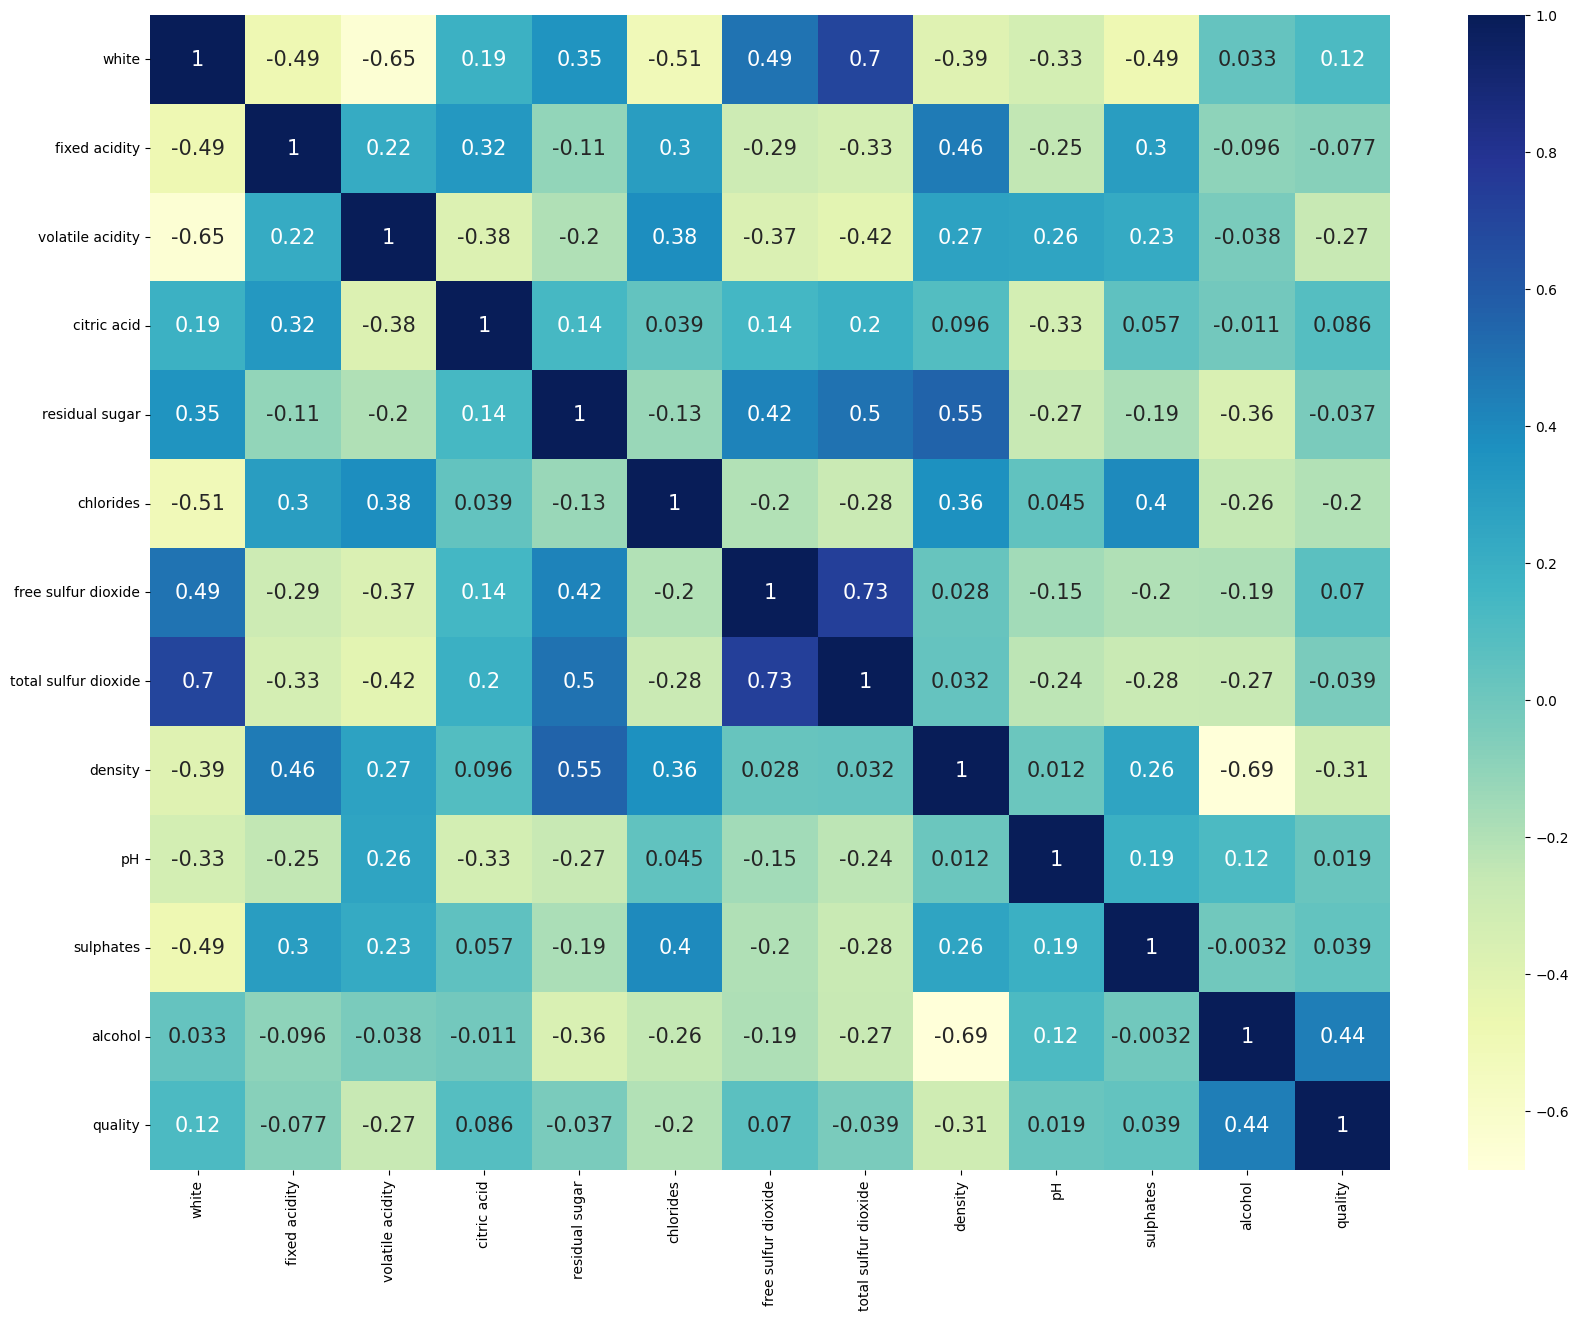

In [86]:
plt.figure(figsize=(20,15))
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True, annot_kws={'size': 15}) 
  
# displaying heatmap 
plt.show()

In [87]:
df

white  fixed acidity  volatile acidity  citric acid  residual sugar  \
0       1.0            7.0             0.270         0.36            20.7   
1       1.0            6.3             0.300         0.34             1.6   
2       1.0            8.1             0.280         0.40             6.9   
3       1.0            7.2             0.230         0.32             8.5   
4       1.0            7.2             0.230         0.32             8.5   
...     ...            ...               ...          ...             ...   
6492    0.0            6.2             0.600         0.08             2.0   
6493    0.0            5.9             0.550         0.10             2.2   
6494    0.0            6.3             0.510         0.13             2.3   
6495    0.0            5.9             0.645         0.12             2.0   
6496    0.0            6.0             0.310         0.47             3.6   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0         0.045                 45.0                 170.0  1.00100  3.00   
1         0.049                 14.0                 132.0  0.99400  3.30   
2         0.050                 30.0                  97.0  0.99510  3.26   
3         0.058                 47.0                 186.0  0.99560  3.19   
4         0.058                 47.0                 186.0  0.99560  3.19   
...         ...                  ...                   ...      ...   ...   
6492      0.090                 32.0                  44.0  0.99490  3.45   
6493      0.062                 39.0                  51.0  0.99512  3.52   
6494      0.076                 29.0                  40.0  0.99574  3.42   
6495      0.075                 32.0                  44.0  0.99547  3.57   
6496      0.067                 18.0                  42.0  0.99549  3.39   

      sulphates  alcohol  quality  
0          0.45      8.8        6  
1          0.49      9.5        6  
2          0.44     10.1        6  
3          0.40      9.9        6  
4          0.40      9.9        6  
...         ...      ...      ...  
6492       0.58     10.5        5  
6493       0.60     11.2        6  
6494       0.75     11.0        6  
6495       0.71     10.2        5  
6496       0.66     11.0        6  

[6497 rows x 13 columns]

In [88]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [89]:
X

array([[ 1.   ,  7.   ,  0.27 , ...,  3.   ,  0.45 ,  8.8  ],
       [ 1.   ,  6.3  ,  0.3  , ...,  3.3  ,  0.49 ,  9.5  ],
       [ 1.   ,  8.1  ,  0.28 , ...,  3.26 ,  0.44 , 10.1  ],
       ...,
       [ 0.   ,  6.3  ,  0.51 , ...,  3.42 ,  0.75 , 11.   ],
       [ 0.   ,  5.9  ,  0.645, ...,  3.57 ,  0.71 , 10.2  ],
       [ 0.   ,  6.   ,  0.31 , ...,  3.39 ,  0.66 , 11.   ]])

In [90]:
y

array([6, 6, 6, ..., 6, 5, 6], dtype=int64)

In [91]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=1)

In [92]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)
score = cross_val_score(LinearRegression(), X, y)
scores = []
scores.append(score.sum()/len(score))

for i in range(0, len(y_pred)):
    y_pred[i] = round(y_pred[i])

acclinregfolds6 = accuracy_score(y_test, y_pred)
print('Accuracy of LinearRegression on validation set:', acclinregfolds6)  
print('Cross Validation Score: ', score.sum()/len(score))

Accuracy of LinearRegression on validation set: 0.5161538461538462
Cross Validation Score:  0.2618233483191999
